### Time Series Forcasting

In [1]:
import json
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [2]:
#getting data

#data from CrytoCompare API
cryptocompareAPI = '9c9005d2d8bc03131d48edfa3bc550aa22980244d00f2956b52f017eec57af90'

#adding timestamp to ensure API data relates to the same timeframe
url = 'https://min-api.cryptocompare.com/data/blockchain/staking/histoday?fsym=ETH&limit=100&api_key={}'.format(cryptocompareAPI)

response = requests.get(url)
data = json.loads(response.text)

y_t = [r['rate'] for r in data['Data']['Data']]
x_t = [r['time'] for r in data['Data']['Data']]

In [3]:
#getting data into dataframe for easier reading / analysis
data = {'ETH staking rate': y_t, 'Timestamp': x_t}
df = pd.DataFrame(data=data)
df

,ETH staking rate,Timestamp
0,4.3934,1642291200
1,4.3696,1642377600
2,4.3769,1642464000
3,4.3832,1642550400
4,4.3756,1642636800
...,...,...
95,3.9115,1650499200
96,3.8830,1650585600
97,3.8847,1650672000
98,3.8824,1650758400


Text(0, 0.5, 'Staking Rate ETH, Daily')

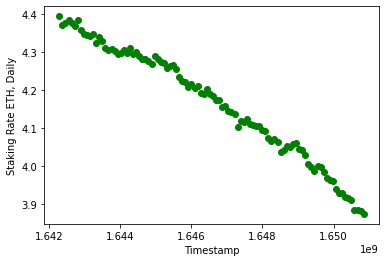

In [4]:
plt.plot(x_t,y_t,'go')
plt.xlabel("Timestamp")
plt.ylabel("Staking Rate ETH, Daily")

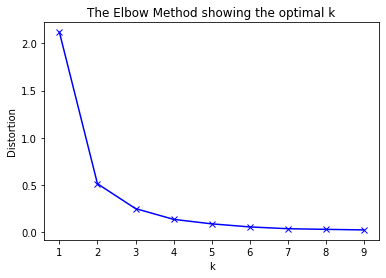

In [5]:
# elbow plot which helps us to determine the optimal number of clusters for this dataset. 
# the largest drop of shows the optimal number of clusters, in this case likely 3 or 4.

distortions = []
K = range(1, 10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(np.array(y_t).reshape(-1, 1))
    distortions.append(model.inertia_)

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

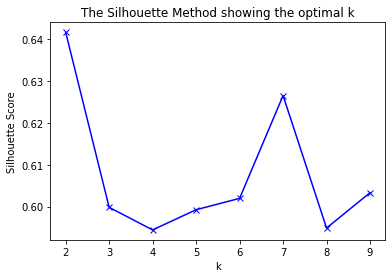

In [6]:
sil = []
# must have at least 2 labels to work
K = range(2, 10)

for k in K:
    model = KMeans(n_clusters=k)
    pred = model.fit_predict(np.array(y_t).reshape(-1, 1))
    score = silhouette_score(np.array(y_t).reshape(-1, 1), pred)
    sil.append(score)

plt.plot(K, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('The Silhouette Method showing the optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6417230324015212
For n_clusters = 3 The average silhouette_score is : 0.6022369896414138
For n_clusters = 4 The average silhouette_score is : 0.5944246241107317
For n_clusters = 5 The average silhouette_score is : 0.5992545677564699
For n_clusters = 6 The average silhouette_score is : 0.6019734094275017
For n_clusters = 8 The average silhouette_score is : 0.5958300511509925
For n_clusters = 10 The average silhouette_score is : 0.6116014089746064


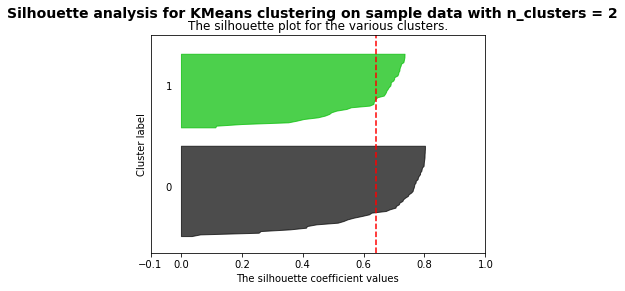

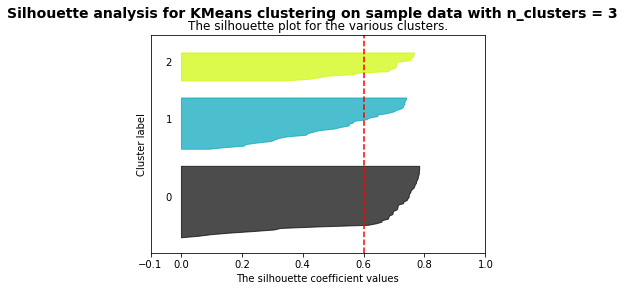

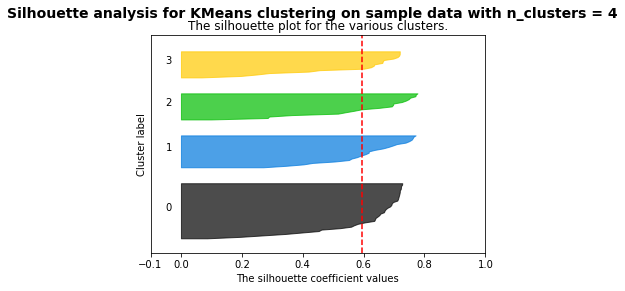

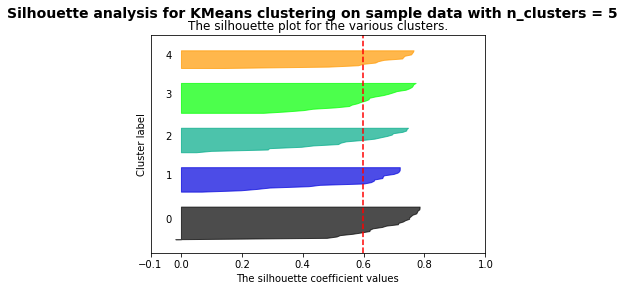

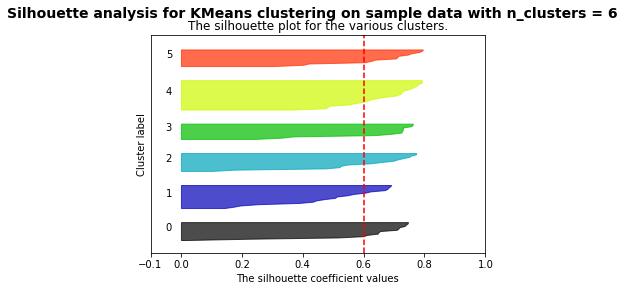

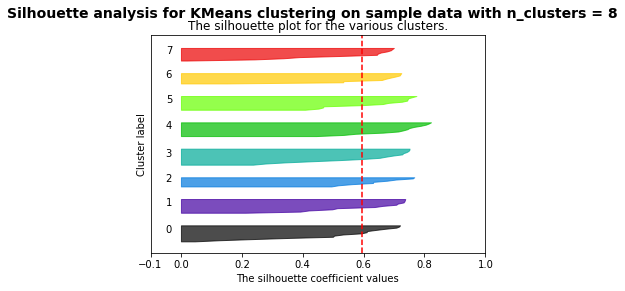

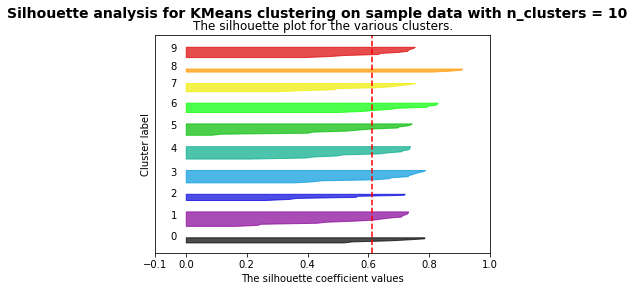

In [7]:
range_n_clusters = [2, 3, 4, 5, 6, 8, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 1 columns
    fig, (ax1) = plt.subplots(1, 1)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all are from 0
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(np.array(y_t).reshape(-1, 1)) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(np.array(y_t).reshape(-1, 1))

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(np.array(y_t).reshape(-1, 1), cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(np.array(y_t).reshape(-1, 1), cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Silhoutte anaysis and elbow plots show that 3 or 4 is likely to be the the optimum number clusters, and so we do KMeans analysis with 4 clusters.

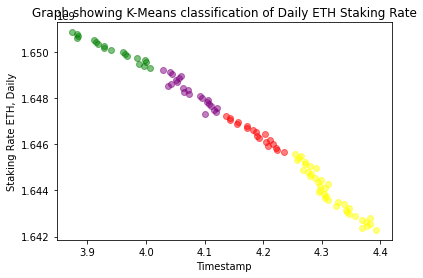

In [8]:
model = KMeans(n_clusters=4, n_init=100)
model.fit(np.array(y_t).reshape(-1, 1))
labels = model.predict(np.array(y_t).reshape(-1, 1))

colours = ['purple', 'yellow', 'red', 'green']

for i in range(len(colours)):
    # Assign the columns of new_points: xs and ys
    xs = np.array(y_t).reshape(-1, 1)[labels == i]
    ys = np.array(x_t).reshape(-1, 1)[labels == i]
    # Make a scatter plot of xs and ys, using labels to define the colors
    plt.scatter(xs, ys, c=colours[i], alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

plt.title('Graph showing K-Means classification of Daily ETH Staking Rate')
plt.xlabel("Timestamp")
plt.ylabel("Staking Rate ETH, Daily")
plt.show()

### Analysis of results

We are looking at the staking rate of Ethereum. This series was chosen, because of the simple fact that it would be more interesting to analyse the factors which affect the staking rate, than the more well-known factors that affect something like the exchange rate.

As staking rate often effects the price of cryptocurrencies, this is because it is affected by the market forces of supply and demand. If more people stake (meaning that essentially peoples coins are locked up for a pre-determined amount of time) there are fewer coins circulating the crypto market, hence a shortage of coins and an increase in demand for them will cause a rally in coin prices. It would also be interesting to follow the price of Ethereum in USD/GDP along the same time period, allowing us to analyse if the price ef-fects the staking rate in the same way. 

Another factor that would be interesting to observe would be this data alongside the stak-ing rates of other cryptocurrencies, this would allow us to see whether the staking rate tends to rise or drop at certain time periods and assess whether there are other external factors that correlate with these fluctuations, such as electricity prices for example. (Derrick I.,2022)


#### references

Derrick, I. (n.d.). Impact of Staking On Prices – CoinwuT. [online] Available at: https://coinwut.com/staking-impact-prices/?fbclid=IwAR3ZCFDq_ZUamR_f5MXK_rUg-hHuoqrSuUFyOx0-hAwJITCyxjCq-9zOMlA
 [Accessed 26 Apr. 2022].